In [1]:
import pandas as pd
import numpy as np
from urllib2 import Request, urlopen
import json
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Sample code for collecting post data from Facebook 

In [2]:
def getUrlJson(url):
    request = Request(url, headers={'User-Agent' : "Chrome"})
    response = urlopen(request)
    result = response.read().decode('utf-8')
    res_json = json.loads(result)
    return res_json

In [3]:
page_id = 'leehsienloong'
fields = ["shares", "story", "message", "status_type", "created_time"]
token = '2031478377138497|7I-9i_f_CU_TMkXpLDLN_cdl8Y0'

In [4]:
def retrieveFacebookPosts(page_id, token, fields, num_pages):
    i = 0
    url = 'https://graph.facebook.com/{}/posts?access_token={}&fields={}'.format(page_id, token, (",").join(fields))
    results = pd.DataFrame()
    while True:
        i += 1
        res_json = getUrlJson(url)
        result = pd.read_json(json.dumps(res_json['data']))
        #result = pd.io.json.json_normalize(res_json['data'])
        results = results.append(result)
        try:
            url = res_json['paging']['next']
            # print(url)
        except KeyError:
            print("no more posts")
            break
        if i >= num_pages:
            print("stopping on provided limit")
            break
    return results

In [5]:
#lhl_posts = retrieveFacebookPosts('leehsienloong', token, fields, 1000)

In [6]:
#lhl_posts['share_count'] = lhl_posts['shares'].apply(lambda x: x['count'] if type(x) is dict else x)
#del lhl_posts['shares']

In [7]:
#lhl_posts.to_json("data/facebook.json", orient="records", date_format="iso")

### Lab Exercise 
#### Reading and viewing the dataset

In [8]:
fb = pd.read_json("data/facebook.json")

In [9]:
fb.head()

,created_time,id,message,share_count,status_type,story
0,2017-07-22 12:08:26,125845680811480_1549087385153962,The Central Singapore Community Development Co...,54.0,added_photos,Lee Hsien Loong added 2 new photos to the albu...
1,2017-07-21 01:00:00,125845680811480_1547453581984009,"In many ways, racial harmony is like making mu...",103.0,added_photos,None
2,2017-07-20 02:03:51,125845680811480_1546478675414833,"Race, language, and religion are fault lines t...",170.0,added_photos,Lee Hsien Loong added 9 new photos to the albu...
3,2017-07-19 02:03:34,125845680811480_1545406252188742,"Puan Noor Aishah was only 26 when her husband,...",120.0,added_photos,Lee Hsien Loong added 3 new photos to the albu...
4,2017-07-18 14:21:53,125845680811480_1544866842242683,Spent a fun morning visiting two preschools in...,338.0,added_video,None


In [10]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528 entries, 0 to 2527
Data columns (total 6 columns):
created_time    2528 non-null datetime64[ns]
id              2528 non-null object
message         2467 non-null object
share_count     2443 non-null float64
status_type     2513 non-null object
story           1310 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 138.2+ KB


#### Set created_time as the dataframe's index and sort the dataframe by the datetime index

In [11]:
fb.set_index('created_time', inplace=True)

In [12]:
fb.sort_index(inplace=True)

In [13]:
fb.head()

,id,message,share_count,status_type,story
created_time,,,,,
1952-02-10 08:00:00,125845680811480_309672785762101,None,3.0,None,Lee Hsien Loong added a life event from Februa...
1958-01-01 08:00:00,125845680811480_309673622428684,None,5.0,None,Lee Hsien Loong added a life event from 1958: ...
1964-01-01 08:00:00,125845680811480_309671562428890,None,5.0,None,Lee Hsien Loong added a life event from 1964: ...
1973-07-01 07:00:00,125845680811480_309672155762164,None,85.0,None,Lee Hsien Loong added a life event from July 1...
1974-06-21 07:00:00,125845680811480_309672595762120,None,2.0,None,Lee Hsien Loong added a life event from June 2...


In [14]:
fb.tail()

,id,message,share_count,status_type,story
created_time,,,,,
2017-07-18 14:21:53,125845680811480_1544866842242683,Spent a fun morning visiting two preschools in...,338.0,added_video,None
2017-07-19 02:03:34,125845680811480_1545406252188742,"Puan Noor Aishah was only 26 when her husband,...",120.0,added_photos,Lee Hsien Loong added 3 new photos to the albu...
2017-07-20 02:03:51,125845680811480_1546478675414833,"Race, language, and religion are fault lines t...",170.0,added_photos,Lee Hsien Loong added 9 new photos to the albu...
2017-07-21 01:00:00,125845680811480_1547453581984009,"In many ways, racial harmony is like making mu...",103.0,added_photos,None
2017-07-22 12:08:26,125845680811480_1549087385153962,The Central Singapore Community Development Co...,54.0,added_photos,Lee Hsien Loong added 2 new photos to the albu...


#### Convert the datetime index from utc to Asia / Singapore 

In [15]:
fb.index = fb.index.tz_localize('utc').tz_convert('Asia/Singapore')

#### Plot the weekly counts of posts from 2012 onwards

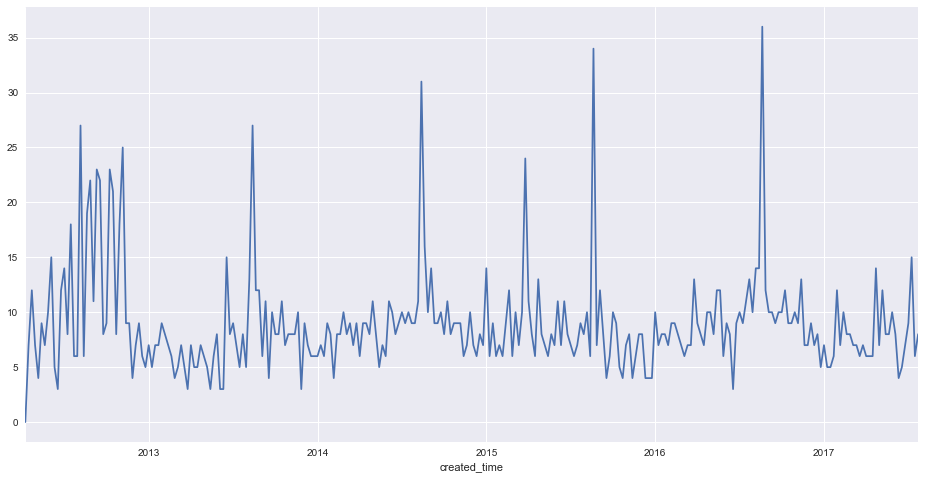

In [16]:
plt.figure(figsize=(16,8))
fb['2012':].resample('W').count()['message'].plot()

#### Plot the weekly share count totals from 2012 onwards 

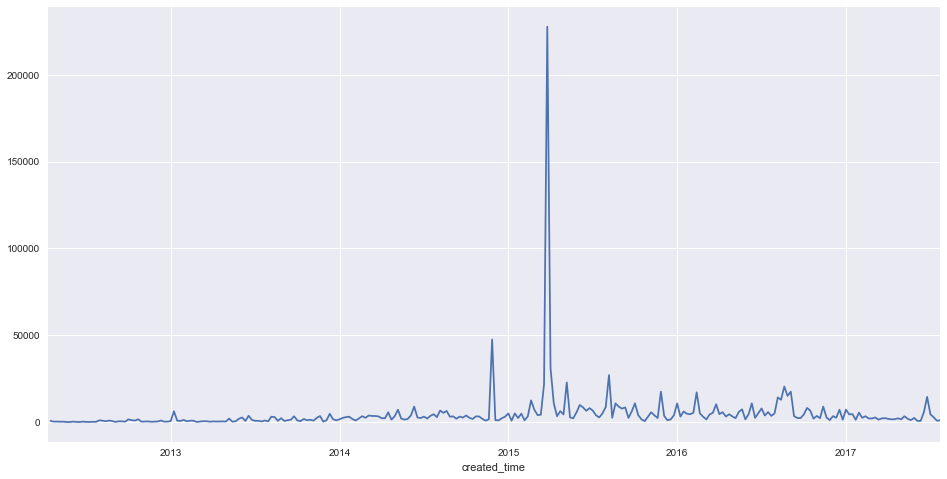

In [17]:
plt.figure(figsize=(16,8))
fb['2012':].resample('W')['share_count'].sum().plot()

#### Which are the top five weeks in terms of total share counts? 

In [18]:
fb['2012':].resample('W')['share_count'].sum().sort_values(ascending=False)[:5]

created_time
2015-03-29 00:00:00+08:00    227658.0
2014-11-30 00:00:00+08:00     47578.0
2015-04-05 00:00:00+08:00     31088.0
2015-08-09 00:00:00+08:00     27116.0
2015-05-10 00:00:00+08:00     22893.0
Name: share_count, dtype: float64

In [19]:
ab = fb['2012':].resample('W')['share_count'].sum().sort_values(ascending=False)[:5].index

In [20]:
fb['2012':].resample('W')['share_count'].sum()[ab]

created_time
2015-03-29 00:00:00+08:00    227658.0
2014-11-30 00:00:00+08:00     47578.0
2015-04-05 00:00:00+08:00     31088.0
2015-08-09 00:00:00+08:00     27116.0
2015-05-10 00:00:00+08:00     22893.0
Name: share_count, dtype: float64

#### What event and posts resulted in the highest weekly share count?

In [21]:
fb['2015-03']

,id,message,share_count,status_type,story
created_time,,,,,
2015-03-02 09:05:58+08:00,125845680811480_866202600109114,A-level results are out today. To students col...,307.0,added_photos,None
2015-03-02 21:01:11+08:00,125845680811480_866598870069487,"Joined Dr Tony Tan, Mrs Mary Tan, Goh Chok Ton...",173.0,added_photos,None
2015-03-04 21:06:12+08:00,125845680811480_867713179958056,The Budget debate began yesterday. NMP Chia Yo...,1826.0,added_video,None
2015-03-05 20:34:20+08:00,125845680811480_868546676541373,"In the Budget debate yesterday, NTUC Secretary...",224.0,added_photos,None
2015-03-06 09:03:12+08:00,125845680811480_868834393179268,STATEMENT FROM THE PRIME MINISTER’S OFFICE ON ...,248.0,mobile_status_update,None
2015-03-06 12:19:07+08:00,125845680811480_868892703173437,"Upper Peirce Reservoir, taken on an evening wa...",165.0,added_photos,Lee Hsien Loong updated their cover photo.
2015-03-06 21:50:00+08:00,125845680811480_869211796474861,“Never take our peace for granted. A strong de...,423.0,added_video,None
2015-03-07 11:07:07+08:00,125845680811480_869406209788753,Met religious leaders over two lunches this we...,488.0,added_photos,Lee Hsien Loong with Rajakanth Raman and 4 oth...
2015-03-08 09:04:20+08:00,125845680811480_869848606411180,"At my National Day Rally last year, I announce...",NaN,shared_story,Lee Hsien Loong shared Yaacob Ibrahim's album.


### Let's see if we can predict the popularity of FB posts

#### Plot a boxplot of share count, adjust the axis limits as necessary 

(0, 1000)

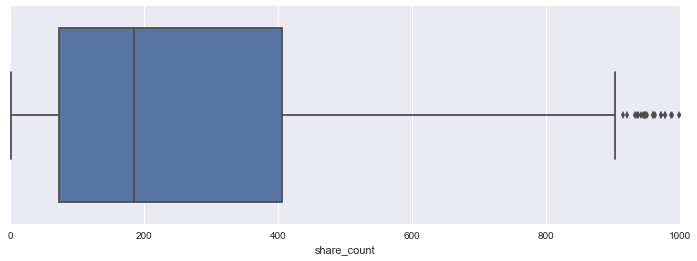

In [22]:
plt.figure(figsize=(12,4))
sb.boxplot("share_count", data=fb)
plt.xlim(0,1000)

#### Let's indicate a popular post as one with share count > 200. Create a new column 'popular' to reflect this

In [50]:
fb['popular'] = fb['share_count'] > 200

#### First replace all null values in the message column with the story column and the remaining null values with an empty string

In [51]:
fb.message = fb.message.fillna(fb.story)

In [52]:
fb.message = fb.message.fillna("")

#### Next let's split the data into a train and test dataset with posts from 2017 onwards being in the test dataset

In [53]:
fb_train = fb[:'2016']

In [54]:
fb_test = fb['2017':]

In [55]:
len(fb_train), len(fb_test)

(2296, 232)

#### Initialize a CountVectorizer using english stopwords and with 500 maximum features and ngram range = (1,1)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [57]:
cv = CountVectorizer(stop_words = 'english', max_features = 500, ngram_range=(1,1))

In [58]:
#cv = TfidfVectorizer(stop_words='english', max_features = 500, ngram_range=(1,1))

#### Fit and transform the message column of the training dataset with the CountVectorizer

In [59]:
train_words = cv.fit_transform(fb_train.message)

In [60]:
train_words.shape

(2296, 500)

#### Using the same CountVectorizer, transform the message column of the test dataset 

In [61]:
test_words = cv.transform(fb_test.message)

In [62]:
test_words.shape

(232, 500)

#### lnitialize a RandomForestClassifier with max depth of 5 number of estimators 10 and min samples per leaf 5 and random_state = 8

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
model = RandomForestClassifier(max_depth = 5, n_estimators = 10, min_samples_leaf = 5, random_state=8)

#### Fit the classifier using the bag of words as the independent variable / predictors and popular as the dependent variable we want to predict 

In [65]:
model.fit(train_words, fb_train.popular)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=8,
            verbose=0, warm_start=False)

#### Which words have the highest feature importances? 

In [66]:
features = cv.get_feature_names()
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

In [67]:
features_df.head(10)

,Features,Importance Score
242,lhl,0.089595
462,video,0.072307
229,kuan,0.045114
278,mica,0.044305
66,chiez,0.042176
362,river,0.041988
480,went,0.033531
392,singapore,0.032482
412,state,0.031766
437,terrorism,0.028670


#### Calculate the roc_auc_score for predictions on the test dataset

In [71]:
from sklearn.metrics import roc_auc_score

In [72]:
predictions = model.predict(test_words)

In [73]:
roc_auc_score(predictions, fb_test.popular)

0.54161013116237

### Let's re-implement the model using pipelines and GridSearchCV
#### Create a pipeline with two stages, the first being the count vectorizer and the second the random forest classifier

In [74]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
        ('features', cv),
        ('model', model)   
    ])

#### Fit the pipeline using the training dataset 

In [75]:
pipeline.fit(fb_train.message, fb_train.popular)

Pipeline(steps=[('features', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=500, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...estimators=10, n_jobs=1, oob_score=False, random_state=8,
            verbose=0, warm_start=False))])

#### Use the pipeline to make predictions on the test dataset and calculate the roc_auc_score

In [76]:
predictions = pipeline.predict(fb_test.message)

In [77]:
roc_auc_score(predictions, fb_test.popular)

0.54161013116237

#### Initialize a GridSearch CV using the pipeline as the estimator, and passing it a set of parameters with varying values for parameters such as max_features, n_estimators, max_depth. Specify the scoring function as 'roc_auc'. For cross validation, initialize and use KFold with 5 splits and shuffle = True

In [78]:
from sklearn.model_selection import GridSearchCV, KFold

In [79]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)

In [87]:
fit_params = {
    'features__max_features': [2000, 3000],
    'features__ngram_range': [(1, 2), (1,1)],
    'model__n_estimators': [40, 50],
    'model__max_depth': [30, 40],
    'model__min_samples_leaf': [2, 5]
}
gcv = GridSearchCV(pipeline, fit_params, cv=kf, scoring='roc_auc', n_jobs=4)

#### Fit the GridSearchCV using the training data and identify the best estimator

In [88]:
gcv.fit(fb_train.message, fb_train.popular)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise',
       estimator=Pipeline(steps=[('features', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=500, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...estimators=10, n_jobs=1, oob_score=False, random_state=8,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'features__max_features': [2000, 3000], 'model__max_depth': [30, 40], 'model__min_samples_leaf': [2, 5], 'model__n_estimators': [40, 50], 'features__ngram_range': [(1, 2), (1, 1)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

#### What is the score for the best estimator?

In [89]:
gcv.best_score_

0.77799117014286467

In [90]:
gcv.best_params_

{'features__max_features': 3000,
 'features__ngram_range': (1, 2),
 'model__max_depth': 40,
 'model__min_samples_leaf': 2,
 'model__n_estimators': 50}

In [96]:
gcv.best_estimator_.fit(fb_train.message, fb_train.popular)

Pipeline(steps=[('features', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=3000, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
 ...estimators=50, n_jobs=1, oob_score=False, random_state=8,
            verbose=0, warm_start=False))])

In [97]:
preds = gcv.best_estimator_.predict(fb_test.message)

In [98]:
roc_auc_score(preds, fb_test.popular)

0.62668033720665306

### Bonus: Add other categorical and quantitative features to the model i.e. status_type, character and word counts

In [110]:
status_dummies = pd.get_dummies(fb.status_type, dummy_na=True, prefix="st")
fb_features = pd.concat((fb,status_dummies), axis=1)
fb_features['message_character_count'] = fb_features['message'].apply(lambda x: len(x))
fb_features['message_word_count'] = fb_features['message'].apply(lambda x: len(x.split()))

In [111]:
features = list(status_dummies.columns) + ['message_character_count', 'message_word_count']

In [112]:
fb_train = fb_features[:'2016']
fb_test = fb_features['2017':]

In [103]:
from scipy.sparse import hstack
x_train = hstack((train_words, fb_train[features]))
x_test = hstack((test_words, fb_test[features]))

In [120]:
model = RandomForestClassifier(max_depth = 40, n_estimators = 50, min_samples_leaf = 2, random_state = 10)

In [121]:
model.fit(x_train, fb_train.popular)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=10,
            verbose=0, warm_start=False)

In [122]:
preds = model.predict(x_test)

In [123]:
roc_auc_score(preds, fb_test.popular)

0.67776434131962815

In [124]:
features = cv.get_feature_names() + features
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

In [125]:
features_df.head(10)

,Features,Importance Score
507,message_character_count,0.051800
501,st_added_video,0.047885
508,message_word_count,0.039119
242,lhl,0.033548
278,mica,0.029747
505,st_shared_story,0.028671
269,mci,0.012781
462,video,0.012419
229,kuan,0.010486
500,st_added_photos,0.010321
